In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
print('------Setup complete')

------Setup complete


In [3]:
df = pd.read_csv("C:\\Users\\JAGADEESH JADHAV\\Downloads\\bank.csv",sep = ';')
df.head().T

,0,1,2,3,4
age,30,33,35,30,59
job,unemployed,services,management,management,blue-collar
marital,married,married,single,married,married
education,primary,secondary,tertiary,tertiary,secondary
default,no,no,no,no,no
balance,1787,4789,1350,1476,0
housing,no,yes,yes,yes,yes
loan,no,yes,no,yes,no
contact,cellular,cellular,cellular,unknown,unknown
day,19,11,16,3,5


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30.0,jul,329.0,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9.0,may,153.0,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19.0,aug,151.0,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6.0,feb,129.0,4,211,3,other,no
4520,44,NaN,NaN,tertiary,no,1136,yes,yes,NaN,3.0,apr,NaN,2,249,7,other,no


In [5]:
df.isnull().sum()

age          0
job          3
marital      3
education    3
default      0
balance      1
housing      1
loan         0
contact      3
day          1
month        0
duration     2
campaign     0
pdays        0
previous     0
poutcome     0
y            3
dtype: int64

In [7]:
df1 = df.dropna(axis = 0, how = 'any', inplace = False)

In [8]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4504.0,41.179396,10.576761,19.0,33.0,39.0,49.00,87.0
day,4504.0,15.908526,8.242902,1.0,9.0,16.0,21.00,31.0
duration,4504.0,264.071492,260.140231,4.0,104.0,185.0,329.25,3025.0
campaign,4504.0,2.796181,3.114261,1.0,1.0,2.0,3.00,50.0
pdays,4504.0,39.763766,100.160330,-1.0,-1.0,-1.0,-1.00,871.0
previous,4504.0,0.542185,1.693608,0.0,0.0,0.0,0.00,25.0


In [11]:
cat_col = [n for n in df1.columns if df1[n].dtypes == 'object']
for col in cat_col:
    print(col,'\n\n')
    print(df1[col].value_counts())
    print("----------" * 4)

job 


management       966
blue-collar      941
technician       767
admin.           474
services         416
retired          230
self-employed    181
entrepreneur     167
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
----------------------------------------
marital 


married     2790
single      1189
divorced     525
Name: marital, dtype: int64
----------------------------------------
education 


secondary    2298
tertiary     1343
primary       674
unknown       187
na              2
Name: education, dtype: int64
----------------------------------------
default 


no     4428
yes      76
Name: default, dtype: int64
----------------------------------------
balance 


0       356
2        24
1        15
4        13
23       11
       ... 
-352      1
5533      1
-99       1
3021      1
-535      1
Name: balance, Length: 2346, dtype: int64
----------------------------------------
housing 


yes    2549
no     1955
Name: 

Perecentage of subscription 0.0
Percentage of Non subscription 0.0


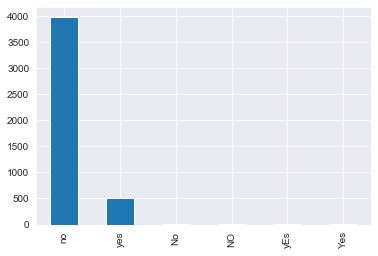

In [12]:
No_sub = len(df1[df1['y'] == 0])
sub = len(df1[df1['y'] == 1])
percent_No_sub = (No_sub/len(df1['y']))*100
percent_sub = (sub/len(df1['y']))* 100

print('Perecentage of subscription', percent_sub)
print('Percentage of Non subscription', percent_No_sub)

df1['y'].value_counts().plot.bar()

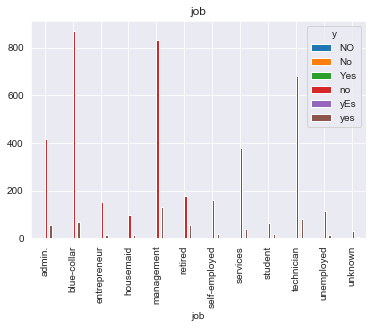

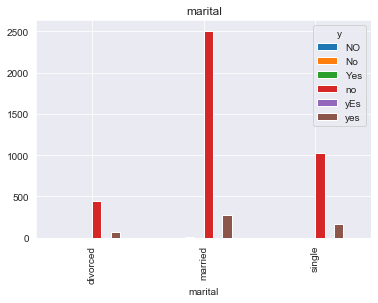

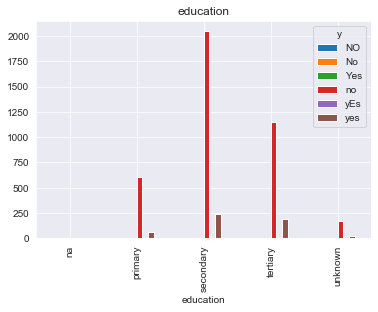

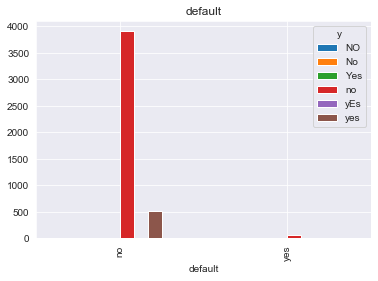

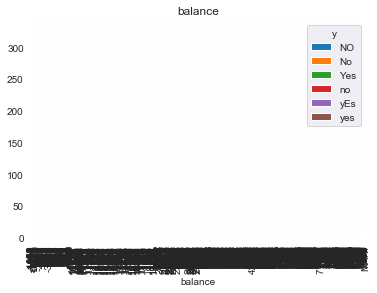

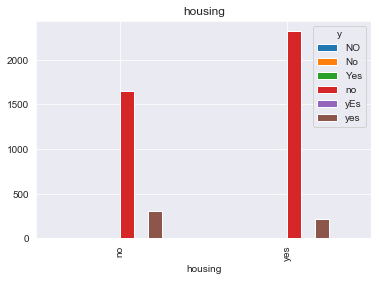

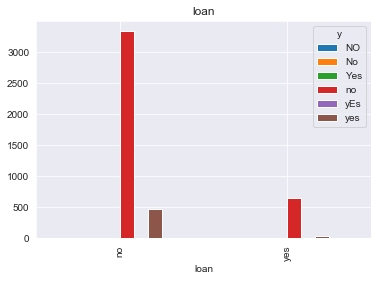

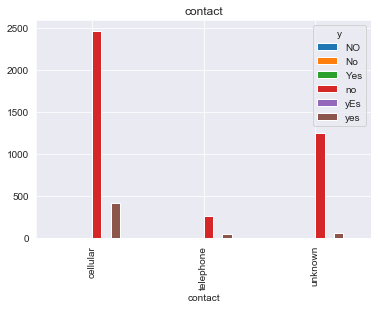

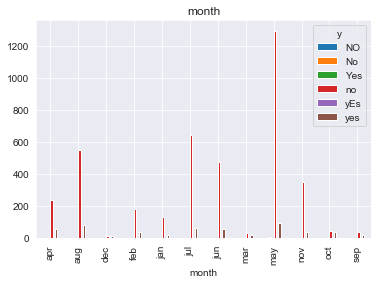

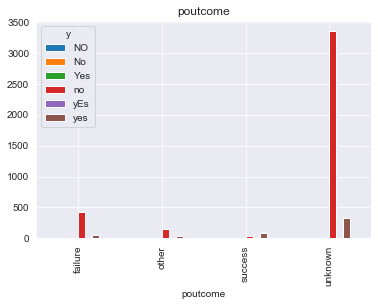

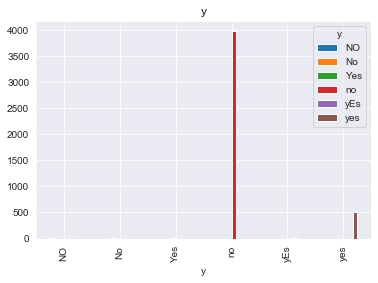

In [16]:
for col in cat_col:
    pd.crosstab(df1[col], df1.y).plot.bar()
    plt.title(col)

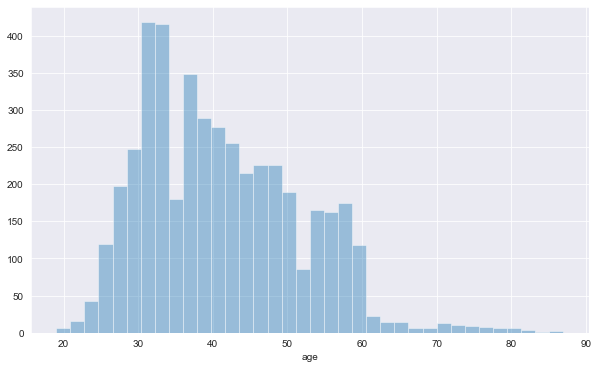

In [17]:
plt.figure(figsize = (10,6))
sns.distplot(a = df1['age'], kde = False)

In [18]:
df1 = pd.get_dummies(df1,columns = ['job','marital','education','default','housing','loan',
                                   'contact','month','poutcome','y'],drop_first = True)

In [19]:
df1.shape

(4504, 48)

In [21]:
df1.tail()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_No,y_Yes,y_no,y_yEs,y_yes
4515,32,473,7.0,624.0,5,-1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4516,33,-333,30.0,329.0,5,-1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4517,57,-3313,9.0,153.0,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4518,57,295,19.0,151.0,11,-1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4519,28,1137,6.0,129.0,4,211,3,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [25]:
df1 = df1.drop('balance', axis = 1)

In [26]:
from sklearn.model_selection import train_test_split
x = df1.loc[:,df1.columns != 'y']
y = df1.loc[:,df1.columns == 'y']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

ValueError: bad input shape (3152, 0)